In [2]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')

In [6]:
iris = datasets.load_iris()

In [7]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
np.unique(iris.target)

array([0, 1, 2])

In [19]:
# 이진 분류 문제로 만들기
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

Text(0,0.5,'sepal width (cm)')

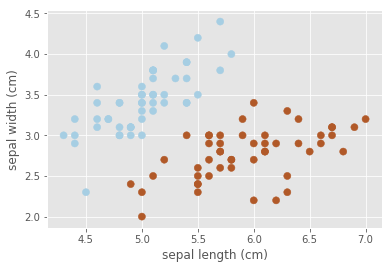

In [26]:
# 데이터 살펴보기 (시각화)

plt.scatter(data[:,0], data[:, 1], c=target, cmap=plt.cm.Paired, s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [28]:
# 데이터셋 나누기
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.1, random_state=42)

In [30]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [33]:
X_test.shape, y_test.shape

((10, 4), (10,))

In [34]:
# 분류기 훈련
lr = cv2.ml.LogisticRegression_create()

In [35]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

In [37]:
lr.setIterations(100)

In [39]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [41]:
# 가중치 검색
lr.get_learnt_thetas()

array([[-0.04109114, -0.01968078, -0.16216496,  0.2870491 ,  0.11945519]],
      dtype=float32)

In [44]:
# 모델 테스트
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

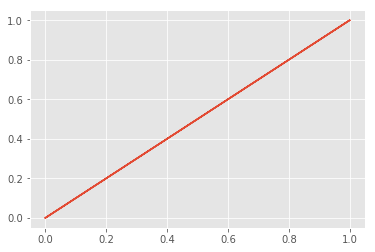

In [46]:
plt.plot(y_test, y_pred)